# Day 2: Protein Mix

In [3]:
from cdk.analysis.cytosol import platereader as pr
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Initialize plotting
pr.plot_setup()

# Load the data

Provide a CSV file containing the data, and a platemap. This function returns both the data with the plate map mapped to it, and the platemap by itself, which is useful for certain tasks.

In [4]:
platemap_path = "../1-design/PURE Workshop 1 Worksheets - Tue - Platemap.tsv"
data_path = "../2-data/20250513-204155-pure-timecourse-gfp-workshop-day2-measure-biotek-cdk.txt"

data, platemap = pr.load_platereader_data(data_path, platemap_path)
platemap.head()

,Well,Sample #,Participant,Type,Name,NEB Sol B -Ribos,Workshop Protein Mix,NEB Ribosomes,NEB Sol A,NEB Sol B,RNAse Inh,DNA,H2O,plamGFP standard,Total Volume
0,A1,1,Viktoriia,Sample,PM Viktoriia,0,3,4.50,10,0.00,1.25,1.25,5.00,0,10
1,A3,2,Riku,Sample,PM Riku,0,3,4.50,10,0.00,1.25,1.25,5.00,0,10
2,A5,3,Parsa,Sample,PM Parsa,0,3,4.50,10,0.00,1.25,1.25,5.00,0,10
3,A7,4,Adriana,Sample,PM Adriana,0,3,4.50,10,0.00,1.25,1.25,5.00,0,10
4,A9,5,Hanqiao,Sample,PM Hanqiao,0,3,4.50,10,0.00,1.25,1.25,5.00,0,10


# Basic Plots

## Kinetics 
Kinetic time traces of every well on the plate

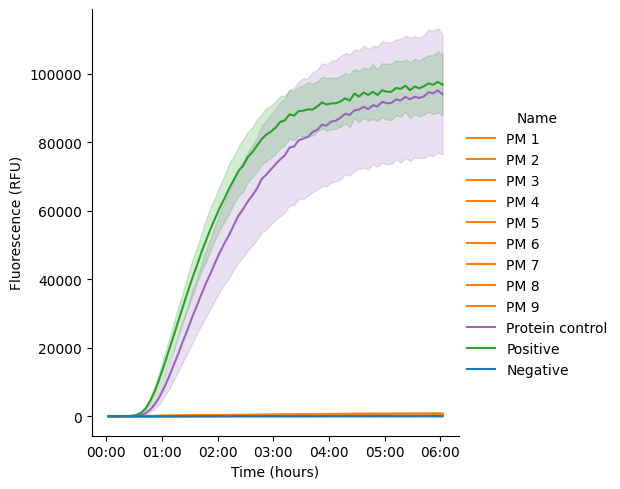

In [9]:
#| label: fig:day2-kinetics

exp_data = data[data["Type"] !="Standard"]

names_to_remove = ['NEB Small Molecule Control']

replace_dict = {'PM Viktoriia':'PM 1',
                'PM Riku':'PM 2',
                'PM Parsa':'PM 3',
                'PM Adriana':'PM 4',
                'PM Hanqiao':'PM 5',
                'PM Severine':'PM 6',
                'PM Jake':'PM 7',
                'PM Tyler':'PM 8',
                'PM bnext':'PM 9',
                'NEB Protein Control': 'Protein control',
                'NEB +DNA':'Positive',
                'NEB -DNA':'Negative'
               }


color_map = {'PM 1':'#ff7f0e',
                'PM 2':'#ff7f0e',
                'PM 3':'#ff7f0e',
                'PM 4':'#ff7f0e',
                'PM 5':'#ff7f0e',
                'PM 6':'#ff7f0e',
                'PM 7':'#ff7f0e',
                'PM 8':'#ff7f0e',
                'PM 9':'#ff7f0e',
                'Protein control':'#9467bd',
                'Positive':'#2ca02c',
                'Negative':'#1f77b4'
               }

data_drop = exp_data.drop(exp_data[exp_data['Name'].isin(names_to_remove)].index)
data_drop['Name'] = data_drop['Name'].replace(replace_dict)

# exp_data = data[data["Type"] != "Standard"]

pr.plot_curves(data_drop, palette=color_map);

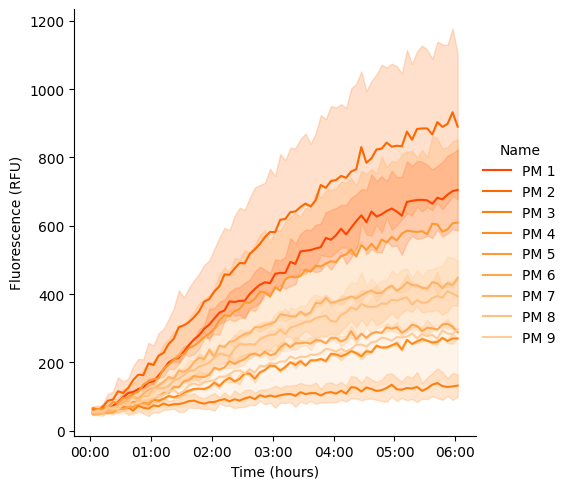

In [13]:
#| label: fig:day2-kinetics-participants

ppt_data = data[data["Type"] == "Sample"]

replace_dict = {'PM Viktoriia':'PM 1',
                'PM Riku':'PM 2',
                'PM Parsa':'PM 3',
                'PM Adriana':'PM 4',
                'PM Hanqiao':'PM 5',
                'PM Severine':'PM 6',
                'PM Jake':'PM 7',
                'PM Tyler':'PM 8',
                'PM bnext':'PM 9',
               }

orange_color_map = {'PM 1':'#ff4500',
                     'PM 2':'#ff6600',
                     'PM 3':'#ff7f0e',
                     'PM 4':'#ff8c1a',
                     'PM 5':'#ff9933',
                     'PM 6':'#ffa64d',
                     'PM 7':'#ffb366',
                     'PM 8':'#ffc080',
                     'PM 9':'#ffcc99'
                    }

ppt_data['Name'] = ppt_data['Name'].replace(replace_dict)

pr.plot_curves(ppt_data, palette=orange_color_map);

## Steady state
Bar graph of steady-state endpoint of each sample. Steady state is calculated as the maximum fluorescence value over a 3-sample rolling average on the data.

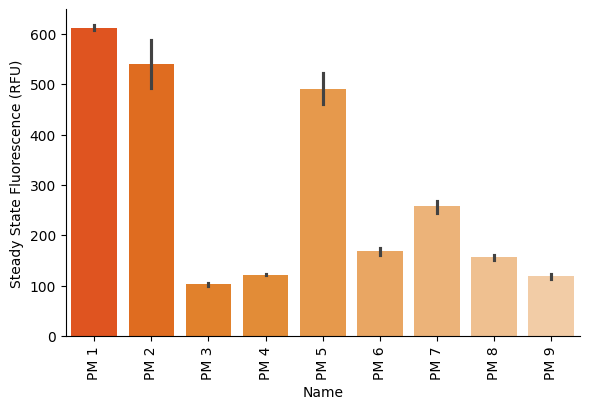

In [17]:
#| label: fig:day2-endpoint-participants

pr.plot_steadystate(ppt_data, palette=orange_color_map);

# Kinetics Analysis
These functions calculate key kinetic parameters of the time series.

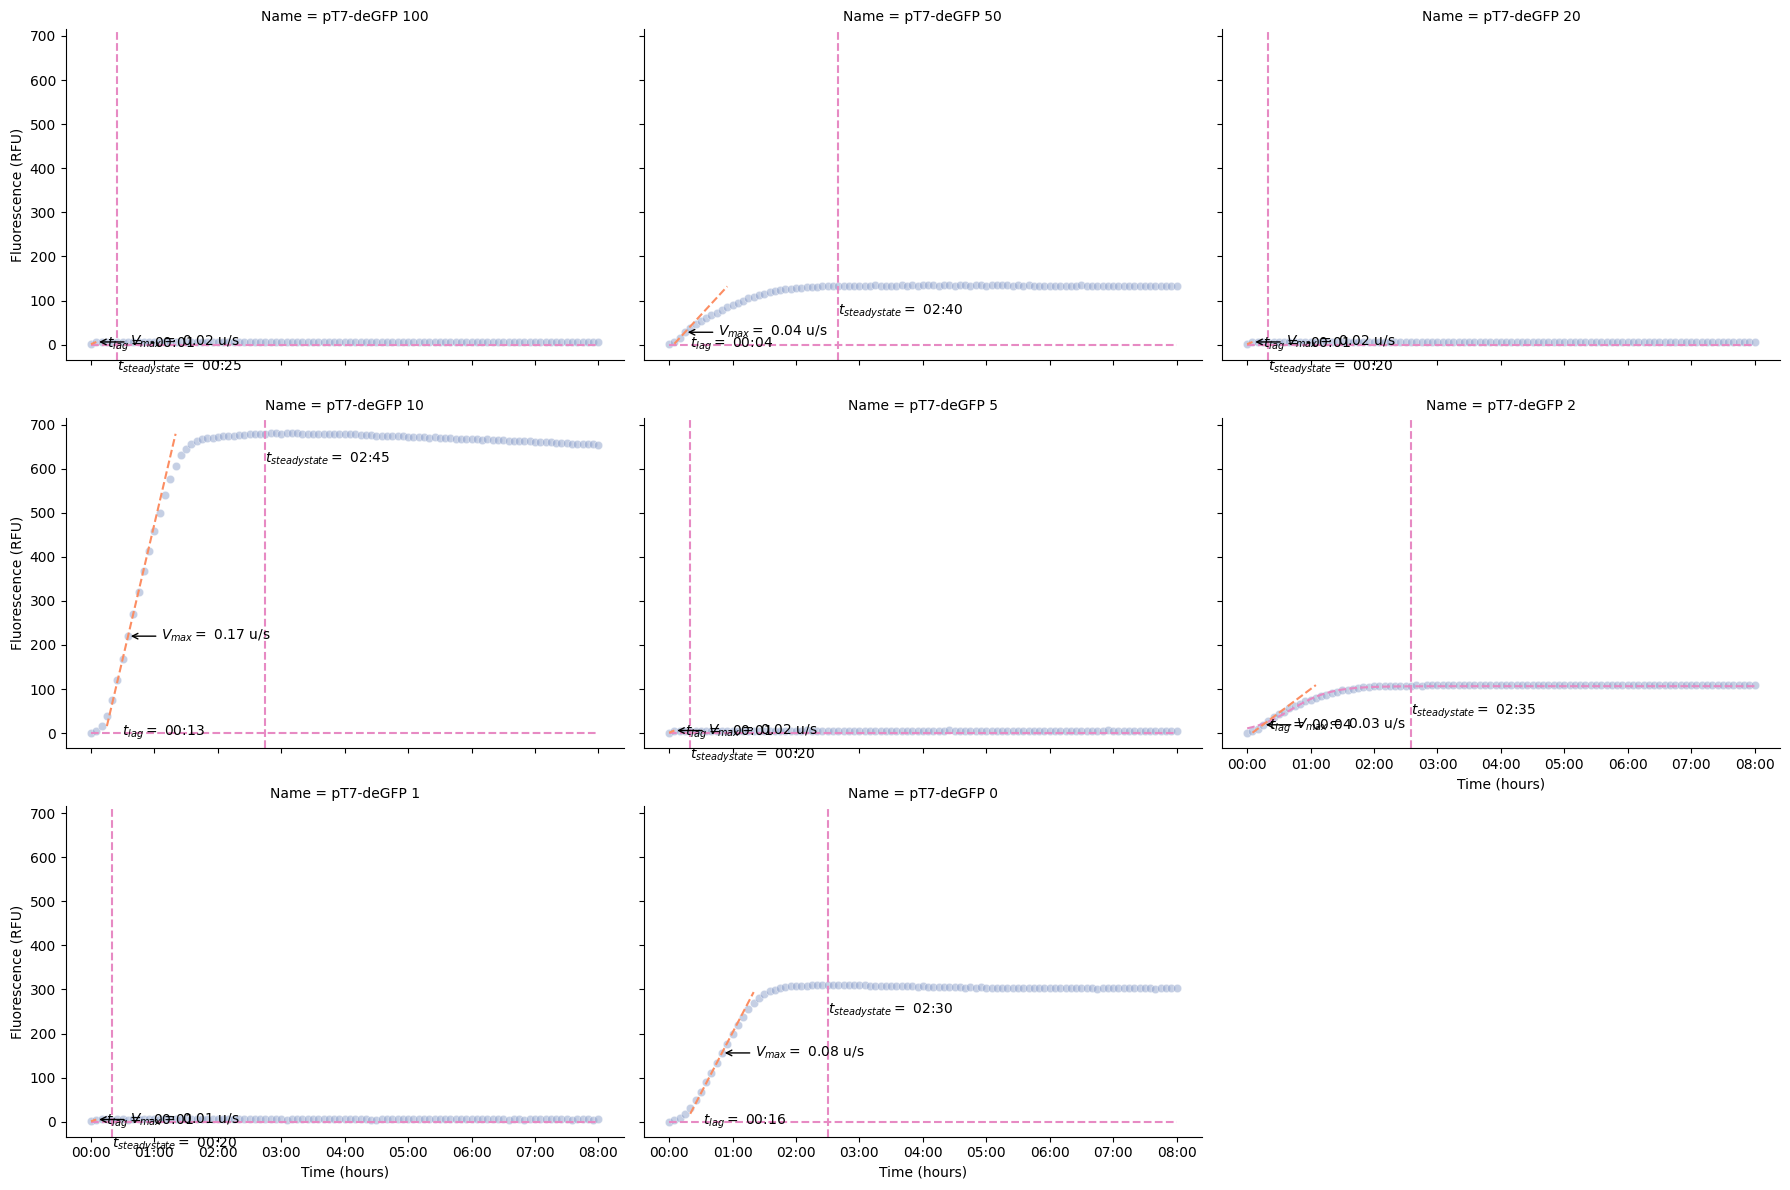

In [24]:
pr.plot_kinetics(data)

We can also calculate the kinetics and display the parameters as a table.

In [25]:
pr.kinetic_analysis(data)

Velocity              \
                                            Time   Data  Max   
Well Name          Read                                        
B1   pT7-deGFP 100 485/20,528/20 0 days 00:05:00   6.00 0.02   
B2   pT7-deGFP 50  485/20,528/20 0 days 00:15:00  28.00 0.04   
B3   pT7-deGFP 20  485/20,528/20 0 days 00:05:00   6.00 0.02   
B4   pT7-deGFP 10  485/20,528/20 0 days 00:35:00 220.00 0.17   
B5   pT7-deGFP 5   485/20,528/20 0 days 00:05:00   6.00 0.02   
B6   pT7-deGFP 2   485/20,528/20 0 days 00:15:00  19.00 0.03   
B7   pT7-deGFP 1   485/20,528/20 0 days 00:05:00   5.00 0.01   
B8   pT7-deGFP 0   485/20,528/20 0 days 00:50:00 156.00 0.08   

                                                       Lag        \
                                                      Time  Data   
Well Name          Read                                            
B1   pT7-deGFP 100 485/20,528/20         -1 days +23:59:00  0.00   
B2   pT7-deGFP 50  485/20,528/20 0 days 00:04:13.846153846  0.00   
B3   pT7-deGFP 20  485/20,528/20         -1 days +23:59:00  0.00   
B4   pT7-deGFP 10  485/20,528/20 0 days 00:13:25.882352941  0.00   
B5   pT7-deGFP 5   485/20,528/20         -1 days +23:59:00  0.00   
B6   pT7-deGFP 2   485/20,528/20 0 days 00:04:26.666666667 13.38   
B7   pT7-deGFP 1   485/20,528/20         -1 days +23:58:45  0.00   
B8   pT7-deGFP 0   485/20,528/20 0 days 00:16:05.217391304  0.00   

                                    Steady State           Fit               
                                            Time   Data      L    k      x0  
Well Name          Read                                                      
B1   pT7-deGFP 100 485/20,528/20 0 days 00:25:00   6.00   0.00 0.00    0.00  
B2   pT7-deGFP 50  485/20,528/20 0 days 02:40:00 132.00   0.00 0.00    0.00  
B3   pT7-deGFP 20  485/20,528/20 0 days 00:20:00   6.00   0.00 0.00    0.00  
B4   pT7-deGFP 10  485/20,528/20 0 days 02:45:00 679.00   0.00 0.00    0.00  
B5   pT7-deGFP 5   485/20,528/20 0 days 00:20:00   6.00   0.00 0.00    0.00  
B6   pT7-deGFP 2   485/20,528/20 0 days 02:35:00 108.00 106.53 0.00 2482.26  
B7   pT7-deGFP 1   485/20,528/20 0 days 00:20:00   5.00   0.00 0.00    0.00  
B8   pT7-deGFP 0   485/20,528/20 0 days 02:30:00 310.00   0.00 0.00    0.00